## Proyek Analisis Data Dengan Python: Bike-Sharing-Dataset

*   Nama : Bimasakti Faturrahman Soetedjo
*   Email Dicoding : riqjuniorbimasakti@gmail.com
*   Dicoding ID : BimaTech

## Menentukan Pertanyaan Bisnis Dataset 📊

* 1️⃣ Pertanyaan 1: Bagaimana persentase musim peminjaman sepeda dan pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
* 2️⃣ Pertanyaan 2: Kapan Waktu Paling Ramai dan Sepi untuk Penyewaan Sepeda?
* 3️⃣ Pertanyaan 3: Siapa yang Lebih Banyak Menggunakan Sepeda: Pengguna Terdaftar atau Tidak Terdaftar?




## Import Library/Package Yang diperlukan Dalam Analisis

In [1]:
# 1. Import Library yang diperlukan untuk analisis data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

## Data Wrangling and Reading

Pada Tahap Ini kita akan membaca file dari day.csv dan juga hour.csv dan menganalisis informasi apa saja yang tersedia pada dataset sebelum melakukan EDA

In [2]:
upload_file = files.upload()
day_df = pd.read_csv(list(upload_file.keys())[0])
day_df

Saving day.csv to day.csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
upload_file = files.upload()
hour_df = pd.read_csv(list(upload_file.keys())[0])
hour_df

Saving hour.csv to hour.csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


berdasarkan dataset tersebut nampak seperti tidak ada perbedaan. tetapi sebenarnya perbedaan antara day.csv dan hour.csv ada pada column hr yang hanya ada terdapat pada dataset hour.csv tetapi tidak terdapat pada day.csv, untuk lebih jelasnya berikut adalah informasi detail yang terdapat pada kedua dataset tersebut:

1. instant: indeks pada setiap baris data yang ada
2. dteday : tanggal peminjaman sepeda oleh pengguna
3. season : musim ketika peminjaman sepeda dilakukan. disini kita asumsikan Musim dingin (1), musim semi (2), musim panas (3), musim gugur (4)
4. yr : tahun dari data tersebut dimana: 2011 (0), 2012 (1)
5. mnth : bulan peminjaman sepeda dalam setahun mulai dari bulan 1 sampai 12
6. hr (khusus dataset hour) : waktu dalam 1 hari 24 jam (0 hingga 23)
7. holiday : indikator yang menunjukkan apakah hari itu adalah hari libur atau tidak? (0) jika bukan hari libur dan (1) jika hari libur
8. weekday : jumlah hari dalam seminggu
9. workingday : indikator yang dipakai apakah hari tersebut bukan akhir pekan atau hari libur? jika nilainya 1 maka berarti workingday, jika tidak maka nilainya 0 atau holiday
10. weathersit : kondisi cuaca pada saat peminjaman sepeda dilakukan. kita asumsikan bahwa Cerah (1), Berawan (2), Hujan atau salju ringan (3)
11. temp : temperatur suhu dalam derajat Celsius pada saat peminjaman sepeda dilakukan oleh para pengguna
12. atemp: suhu yang dirasakan dalam derajat Celsius pada saat peminjaman sepeda dilakukan oleh para pengguna
13. hum: Kelembapan
14. windspeed: Kecepatan angin
15. casual: jumlah peminjam sepeda biasa,bagi pelanggan yang bukan member tetap
16. registered: jumlah peminjam sepeda bagi pelanggan yang terdaftar sebagai member tetap
17. cnt: total jumlah peminjam sepeda, yaitu gabungan dari jumlah peminjam casual dan peminjam terdaftar

## Data Assesing

Pada tahap ini kita akan mencoba melakukan penilian terhadap data apakah ada yang perlu disesuaikan atau sudah sesuai dan siap untuk masuk ke tahap EDA

In [4]:
day_missing = day_df.isnull().sum()
day_missing[day_missing > 0]

,0


In [5]:
hour_missing = hour_df.isnull().sum()
hour_missing[hour_missing > 0]

,0


pada data tersebut kita tau bahwa data yang ada dalam dataset sudah bersih dan terisi semua sehingga pada hal ini kita bisa lewati tahap cleaning dan refill data.


Kemudian kita coba lanjut melakukan pengecekan terhadap tipe data dan melakukan validasi akan tipe data pada dataset

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


dari data tersebut kita tau bahwa untuk tanggal pada dteday bukanlah tipe data objek tetapi lebih kearah tipe datetime, maka dari itu pada tahap ini kita coba untuk sesuaikan menjadi tipe data yang sesuai yaitu datetime sehingga hasilnya lebih sesuai

In [8]:
change_dtypes_datetime = ['dteday']
for change in change_dtypes_datetime:
  day_df[change] = pd.to_datetime(day_df[change])
  hour_df[change] = pd.to_datetime(hour_df[change])

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#Visualization & Explanatory Analysis

###Pertanyaan 1:

#####Bagaimana Pengaruh Faktor Cuaca terhadap Jumlah Penyewaan Sepeda?

In [11]:
# Melihat kategori unik pada variabel musim dan cuaca
unique_season = day_df["season"].unique()

if len(unique_season) == 4:
  spring, summer, fall, winter = unique_season
else:
  print("musim sudah diatas 4, tidak ada musim lain")
print("Kategori musim:", day_df["season"].unique())
print("Kategori cuaca:", day_df["weathersit"].unique())

Kategori musim: [1 2 3 4]
Kategori cuaca: [2 1 3]


- setelah kita mengatagorikan musim dan cuaca, kita akan mencoba melakukan visualisasi data mengenai data penyewaan sepeda berdasarkan musim untuk mencari analisa awal tentang pada musim mana penyewaan sepeda tertinggi dan terendah.

- pada kasus ini, kita menggunakan 3 teknik visualisasi yaitu boxplot, bar dan pie untuk melihat rata-rata dan persentase penyewaan sepeda

<ipython-input-12-197497b675aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df["season"], y=day_df["cnt"], palette=["skyblue", "pink", "khaki", "orange"])


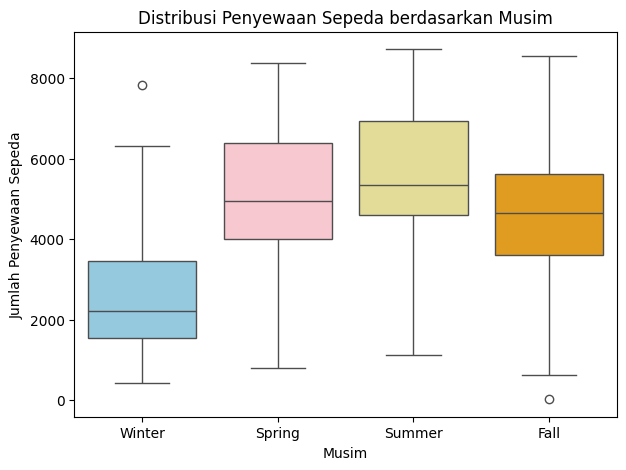

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(x=day_df["season"], y=day_df["cnt"], palette=["skyblue", "pink", "khaki", "orange"])
plt.xticks(ticks=[0,1,2,3], labels=["Winter", "Spring", "Summer", "Fall"], rotation="horizontal")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda berdasarkan Musim")
plt.show()

<Figure size 800x600 with 0 Axes>

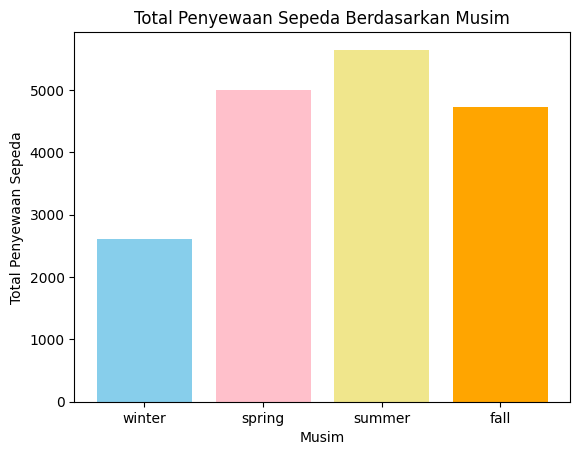

In [13]:
plt.figure(figsize=(8,6))
# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
season_total = day_df.groupby("season")["cnt"].mean()

# Membuat figure dan axes menggunakan Matplotlib
fig, ax = plt.subplots()

# Membuat bar chart
# Perhatikan bahwa kolom 'season' kemungkinan berisi angka (misalnya 1, 2, 3, 4).
# Kita akan menggunakan indeks dari season_total untuk plot.
colors = ["skyblue","pink", "khaki", "orange"]
season_labels = ["winter", "spring", "summer", "fall"]

# Membuat bar chart dengan warna dan label yang sesuai
ax.bar(season_labels, season_total.values, color=colors)

# Mengatur label sumbu x
ax.set_xlabel("Musim")

# Mengatur label sumbu y
ax.set_ylabel("Total Penyewaan Sepeda")

# Mengatur judul plot (opsional)
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")

# Menampilkan plot
plt.show()

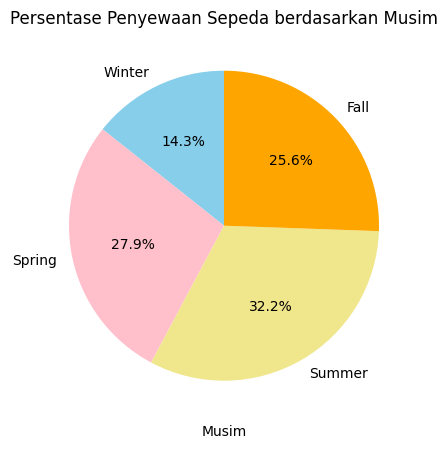

In [14]:
plt.figure(figsize=(5,6))

# Menghitung total penyewaan untuk setiap musim
season_total = day_df.groupby("season")["cnt"].sum()

# Menggunakan data total penyewaan per musim untuk pie chart
plt.pie(season_total,
        labels=["Winter", "Spring", "Summer", "Fall"],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette(["skyblue", "pink", "khaki", "orange"], n_colors=4))

plt.xlabel("Musim")
plt.title("Persentase Penyewaan Sepeda berdasarkan Musim")
plt.show()

In [15]:
# Menghitung total penyewaan untuk setiap musim
season_total = day_df.groupby("season")["cnt"].sum()

# Menampilkan musim dengan penyewaan tertinggi
best_season = season_total.idxmax()
worst_season = season_total.idxmin()
print(f"Musim dengan penyewaan tertinggi adalah musim {best_season} dengan total {season_total.max()} sepeda")
print(f"Musim dengan penyewaan terendah adalah musim {worst_season} dengan total {season_total.min()} sepeda")

Musim dengan penyewaan tertinggi adalah musim 3 dengan total 1061129 sepeda
Musim dengan penyewaan terendah adalah musim 1 dengan total 471348 sepeda


- Berdasarkan hasil analisa awal diketahui bahwa penyewaan sepeda berdasarkan musim, summer atau musim panas memiliki jumlah penyewaan sepeda yang tergolong tinggi yaitu 32,2% lalu diikuti oleh spring atau musim semi sebesar 27.9% dan fall atau musim gugur sebesar 25,6%. sementara untuk musim terendah penyewaan sepeda jatuh pada musim dingin dengan penyewaan sekitar 14,3%.

- pada musim panas menjadi penyewaan tertinggi  dengan total 1061129 sepeda karena biasanya pada musim ini pelanggan berada pada libur panjang sehingga banyak dari mereka menyewa sepeda untuk menikmati libur musim panas

- pada musim dingin menjadi penyewaan terendah engan total 471348 sepeda karena pada musim ini kondisi cuaca ekstrem tidak memungkinkan orang orang untuk menyewa sepeda ditengah jalan bersalju sehingga penyewaan menurun

kemudia kita akan mencoba melakukan visualisasi mengenai penyewaan sepeda berdasarkan cuaca untuk mencari tau tentang cuaca dengan penyewaan sepeda tertinggi dan terendah berada pada iklim seperti apa

<ipython-input-16-60939d75a2ba>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df["weathersit"], y=day_df["cnt"], palette=["skyblue", "cadetblue", "grey"])


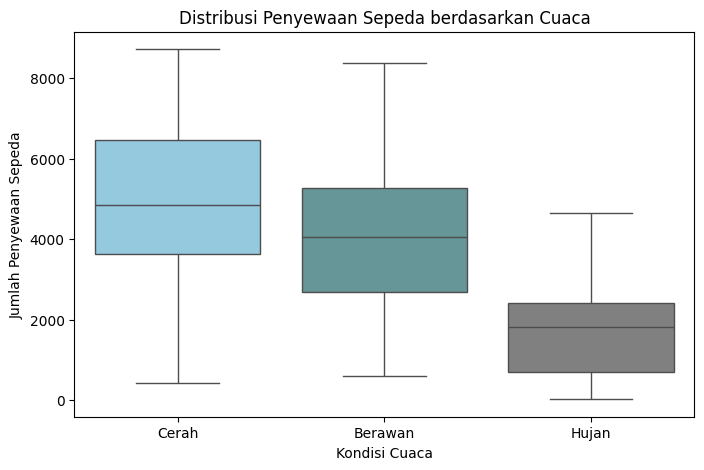

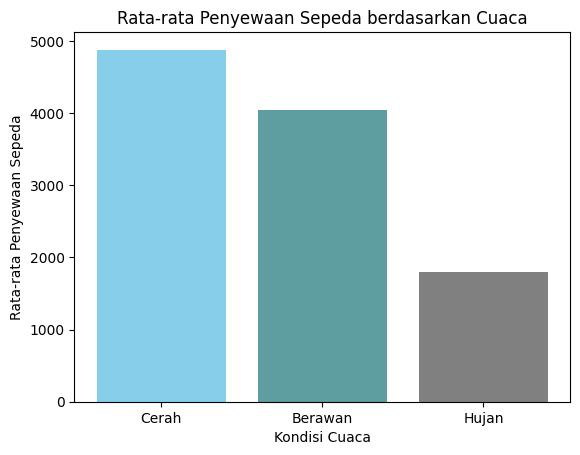

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=day_df["weathersit"], y=day_df["cnt"], palette=["skyblue", "cadetblue", "grey"])
plt.xticks(ticks=[0,1,2], labels=["Cerah", "Berawan", "Hujan"])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda berdasarkan Cuaca")
plt.show()

cuaca_avg = day_df.groupby("weathersit")["cnt"].mean()
fig, ax = plt.subplots()
colors = ["skyblue", "cadetblue", "grey"]
weather_labels = ["Cerah", "Berawan", "Hujan"]
ax.bar(weather_labels, cuaca_avg.values, color=colors)
ax.set_xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda berdasarkan Cuaca")
plt.show()

In [17]:
# Menghitung rata-rata penyewaan untuk setiap kategori cuaca
cuaca_avg = day_df.groupby("weathersit")["cnt"].mean()

# Menampilkan hasil
for i, avg in enumerate(cuaca_avg, 1):
    print(f"Rata-rata penyewaan saat cuaca {i}: {avg:.2f} sepeda")

Rata-rata penyewaan saat cuaca 1: 4876.79 sepeda
Rata-rata penyewaan saat cuaca 2: 4035.86 sepeda
Rata-rata penyewaan saat cuaca 3: 1803.29 sepeda


berdasarkan data diatas dan juga perhitungan rata-rata, dapat disimpulkan bahwa pada cuaca cerah menyewaan sepeda berada pada angka tertinggi sebesar 4876 sepeda disewakan kepada pelanggan sementara pada cuaca hujan penyewaan turun drastis hanya sebesar 1803 sepeda disewakan



Kemudian kita coba cek apakah korelasi antar kelembapan itu homogen dan linear dengan penyewaan sepeda? atau apakah ada korelasi positif lain seperti cuaca terhadap penyewaan sepeda?

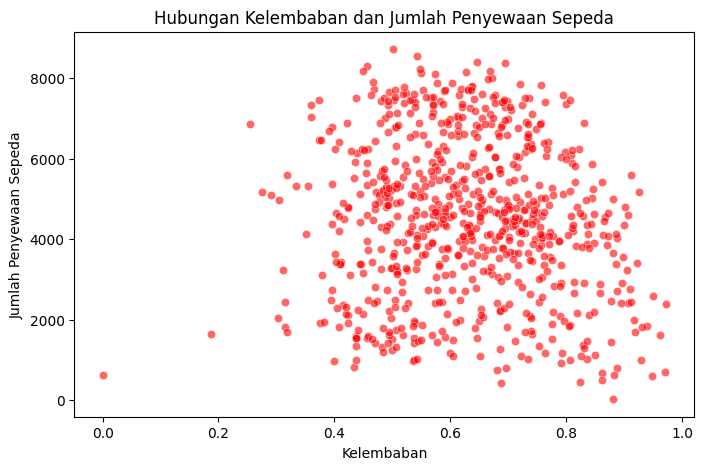

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=day_df["hum"], y=day_df["cnt"], alpha=0.6, color="red")
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Hubungan Kelembaban dan Jumlah Penyewaan Sepeda")
plt.show()

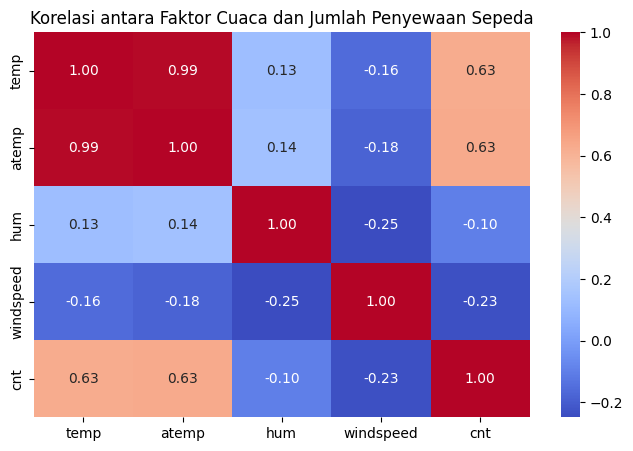

In [19]:
# Menghitung korelasi antara variabel cuaca dan jumlah penyewaan
cuaca_features = ["temp", "atemp", "hum", "windspeed"]
correlations = day_df[cuaca_features + ["cnt"]].corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(8,5))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Faktor Cuaca dan Jumlah Penyewaan Sepeda")
plt.show()

In [20]:
# Definisi fungsi untuk menganalisis pengaruh cuaca terhadap penyewaan sepeda
def analyze_weather_impact(data):
    print("📌 ANALISIS PENGARUH FAKTOR CUACA TERHADAP PENYEWAAN SEPEDA\n")

    # 1️⃣ Menampilkan korelasi faktor cuaca dengan jumlah penyewaan
    print("🔹 1. Korelasi Faktor Cuaca dengan Penyewaan Sepeda:")
    cuaca_features = ["temp", "atemp", "hum", "windspeed"]
    correlations = data[cuaca_features + ["cnt"]].corr()
    print(correlations["cnt"].sort_values(ascending=False))
    print("\n➡️ Suhu (temp, atemp) memiliki korelasi positif terhadap penyewaan sepeda.")
    print("➡️ Kelembaban (hum) dan kecepatan angin (windspeed) cenderung memiliki korelasi negatif terhadap penyewaan.\n")

    # 2️⃣ Menghitung rata-rata penyewaan berdasarkan kondisi cuaca
    print("🔹 2. Rata-rata Penyewaan Berdasarkan Cuaca:")
    cuaca_avg = data.groupby("weathersit")["cnt"].mean()
    for i, avg in enumerate(cuaca_avg, 1):
        print(f"➡️ Rata-rata penyewaan saat cuaca {i}: {avg:.2f} sepeda")

    print("\n➡️ Saat cuaca cerah (weathersit = 1), jumlah penyewaan tertinggi.")
    print("➡️ Saat cuaca hujan (weathersit = 3), jumlah penyewaan menurun drastis.\n")

    # 3️⃣ Mencari musim dengan penyewaan tertinggi
    print("🔹 3. Musim dengan Penyewaan Sepeda Tertinggi:")
    season_total = data.groupby("season")["cnt"].sum()
    best_season = season_total.idxmax()
    print(f"➡️ Musim dengan penyewaan tertinggi adalah musim {best_season} dengan total {season_total.max()} sepeda")
    print("➡️ Musim gugur (season = 3) memiliki jumlah penyewaan tertinggi.\n")

    # 4️⃣ Menentukan dampak suhu dan kelembaban dengan pendekatan kuantil
    print("🔹 4. Analisis Dampak Suhu dan Kelembaban:")
    temp_q3 = data["temp"].quantile(0.75)
    hum_q3 = data["hum"].quantile(0.75)

    high_temp_rentals = data[data["temp"] >= temp_q3]["cnt"].mean()
    low_temp_rentals = data[data["temp"] < temp_q3]["cnt"].mean()
    print(f"➡️ Rata-rata penyewaan pada suhu tinggi: {high_temp_rentals:.2f} sepeda")
    print(f"➡️ Rata-rata penyewaan pada suhu rendah: {low_temp_rentals:.2f} sepeda")

    high_hum_rentals = data[data["hum"] >= hum_q3]["cnt"].mean()
    low_hum_rentals = data[data["hum"] < hum_q3]["cnt"].mean()
    print(f"➡️ Rata-rata penyewaan pada kelembaban tinggi: {high_hum_rentals:.2f} sepeda")
    print(f"➡️ Rata-rata penyewaan pada kelembaban rendah: {low_hum_rentals:.2f} sepeda")

    print("\n✅ **KESIMPULAN FINAL:**")
    print("1️⃣ Cuaca yang lebih cerah meningkatkan jumlah penyewaan sepeda.")
    print("2️⃣ Musim gugur memiliki jumlah penyewaan tertinggi, sementara musim semi lebih rendah.")
    print("3️⃣ Suhu yang lebih tinggi meningkatkan jumlah penyewaan.")
    print("4️⃣ Kelembaban yang lebih tinggi cenderung mengurangi jumlah penyewaan.")
    print("5️⃣ Kecepatan angin memiliki pengaruh kecil terhadap jumlah penyewaan.\n")

# Memanggil fungsi analisis
analyze_weather_impact(day_df)

📌 ANALISIS PENGARUH FAKTOR CUACA TERHADAP PENYEWAAN SEPEDA

🔹 1. Korelasi Faktor Cuaca dengan Penyewaan Sepeda:
cnt          1.000000
atemp        0.631066
temp         0.627494
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64

➡️ Suhu (temp, atemp) memiliki korelasi positif terhadap penyewaan sepeda.
➡️ Kelembaban (hum) dan kecepatan angin (windspeed) cenderung memiliki korelasi negatif terhadap penyewaan.

🔹 2. Rata-rata Penyewaan Berdasarkan Cuaca:
➡️ Rata-rata penyewaan saat cuaca 1: 4876.79 sepeda
➡️ Rata-rata penyewaan saat cuaca 2: 4035.86 sepeda
➡️ Rata-rata penyewaan saat cuaca 3: 1803.29 sepeda

➡️ Saat cuaca cerah (weathersit = 1), jumlah penyewaan tertinggi.
➡️ Saat cuaca hujan (weathersit = 3), jumlah penyewaan menurun drastis.

🔹 3. Musim dengan Penyewaan Sepeda Tertinggi:
➡️ Musim dengan penyewaan tertinggi adalah musim 3 dengan total 1061129 sepeda
➡️ Musim gugur (season = 3) memiliki jumlah penyewaan tertinggi.

🔹 4. Analisis Dampak Suhu dan Kelemb

###Pertanyaan 2:

#####Kapan Waktu Paling Ramai dan Sepi untuk Penyewaan Sepeda?

untuk menjawab pertanyaan ini pertama kita coba lakukan EDA terhadap data untuk mengetahui informasi awal mengenai data

In [21]:
# Mengecek informasi dataset
hour_df.info()

# Mengecek statistik deskriptif
hour_df.describe()

# Mengecek apakah ada data yang hilang
print(hour_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

kemudian kita coba melakukan visualisasi data tentang penyewaan sepeda dalam hitungan per jam mana waktu dengan penyewaan tertinggi dalam satu hari baik di hari libur maupun hari kerja

<ipython-input-22-4f05a3366199>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], ci=None, marker="o", color="b")


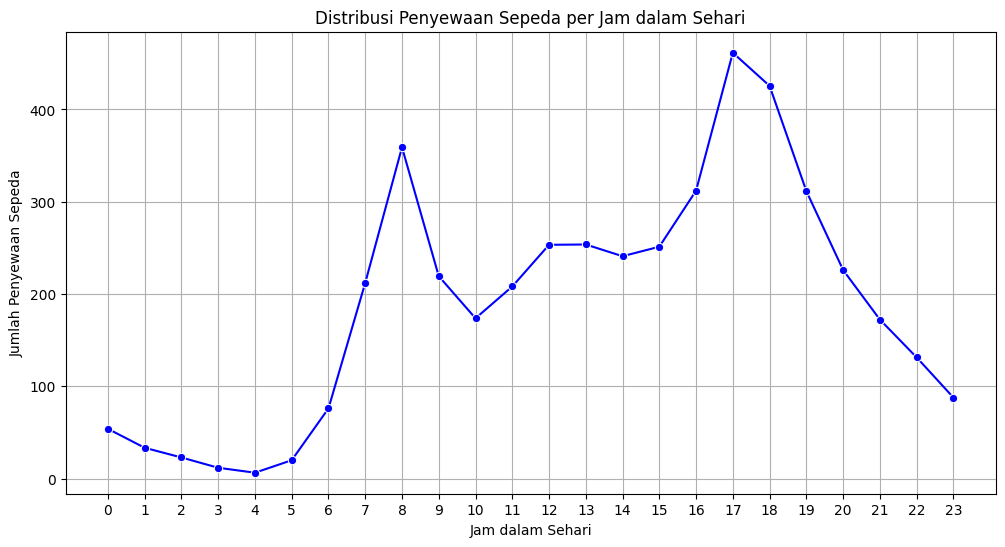

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], ci=None, marker="o", color="b")
plt.xticks(np.arange(0, 24, 1))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda per Jam dalam Sehari")
plt.grid()
plt.show()

<ipython-input-23-075261ef53d5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x="hr", y="cnt", hue="workingday", ci=None, marker="o")


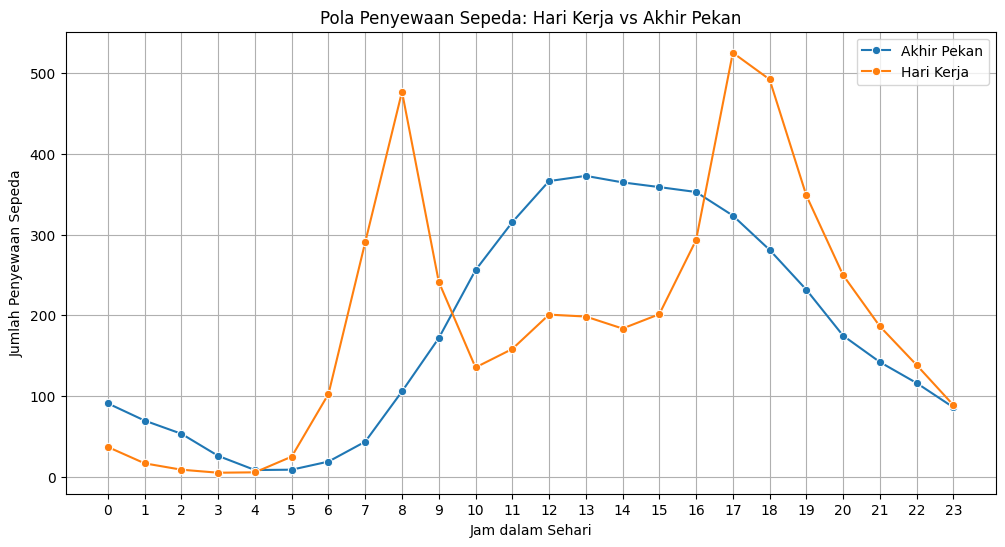

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x="hr", y="cnt", hue="workingday", ci=None, marker="o")
plt.xticks(np.arange(0, 24, 1))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.legend(["Akhir Pekan", "Hari Kerja"])
plt.grid()
plt.show()

In [24]:
# 1️⃣ Mencari jam dengan penyewaan tertinggi & terendah
most_busy_hour = hour_df.groupby("hr")["cnt"].mean().idxmax()
least_busy_hour = hour_df.groupby("hr")["cnt"].mean().idxmin()

print(f"🚴 Jam paling ramai penyewaan: {most_busy_hour}:00")
print(f"💤 Jam paling sepi penyewaan: {least_busy_hour}:00")

# 2️⃣ Mencari perbedaan pola jam sibuk antara hari kerja dan akhir pekan
busy_hour_workday = hour_df[hour_df["workingday"] == 1].groupby("hr")["cnt"].mean().idxmax()
busy_hour_weekend = hour_df[hour_df["workingday"] == 0].groupby("hr")["cnt"].mean().idxmax()

print(f"📆 Jam sibuk di hari kerja: {busy_hour_workday}:00")
print(f"🏖️ Jam sibuk di akhir pekan: {busy_hour_weekend}:00")

🚴 Jam paling ramai penyewaan: 17:00
💤 Jam paling sepi penyewaan: 4:00
📆 Jam sibuk di hari kerja: 17:00
🏖️ Jam sibuk di akhir pekan: 13:00


- berdasarkan hasil visualisasi dan analisis diatas, diketahui bahwa pada hari kerja jam paling sibuk adalah pada jam 5 sore dalam sehari sementara pada akhir pekan jam 1 siang adalah waktu paling sibuk.

- untuk penyewaan paling sepi baik dihari kerja maupun hari libur ada pada sekitar jam 4 pagi dimana dalam statistik data visualisasi tidak beda jauh dan semakin menguatkan pernyataan bahwa di jam tersebut adalah waktu dimana penyewaan sepeda paling sepi

####Manual Grouping Clustering

selanjutnya kita akan mencoba analisis lanjut menggunakan teknik clustering manual grouping dimana kita akan membagi secara manual jam paling sepi hingga ramai penyewaan sepeda berdasarkan statistik yang ada pada jam tersebut

In [25]:
def categorize_hour(hour):
    if hour in [0, 1, 2, 3, 4, 5]:   # Dini hari
        return "Sepi"
    elif hour in [6, 7, 8, 9, 10]:  # Pagi hari
        return "Ramai"
    elif hour in [11, 12, 13, 14, 15]:  # Siang hari
        return "Sedang"
    elif hour in [16, 17, 18, 19]:  # Sore hari
        return "Ramai"
    else:  # Malam hari
        return "Sedang"

# Tambahkan kategori ke dataframe
hour_df["hour_category"] = hour_df["hr"].apply(categorize_hour)

# Lihat hasil pengelompokan
hour_df[["hr", "hour_category", "cnt"]].head(24)

,hr,hour_category,cnt
0,0,Sepi,16
1,1,Sepi,40
2,2,Sepi,32
3,3,Sepi,13
4,4,Sepi,1
5,5,Sepi,1
6,6,Ramai,2
7,7,Ramai,3
8,8,Ramai,8
9,9,Ramai,14


Hasil Manual Grouping tersebut menunjukan bahwa dari pengelompokan diketahui:

- jam paling Sepi → Jam 0-7 (Malam hingga pagi)

- Ramai → = jam 12-17 (sore, pulang kerja)

- Sedang → Jam 9-11 & jam 19-23

selanjutnya kita coba cara lain yaitu metode binning seperti ini:

In [26]:
# Binning berdasarkan rentang jam
bins = [0, 6, 12, 18, 24]  # Rentang kelompok
labels = ["Sepi", "Pagi & Awal Siang", "Siang & Sore", "Malam"]
hour_df["time_bin"] = pd.cut(hour_df["hr"], bins=bins, labels=labels, include_lowest=True)

# Rata-rata penyewaan per cluster
hour_df.groupby("time_bin")["cnt"].mean().sort_values(ascending=False).astype(int)

<ipython-input-26-f793c2721cad>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby("time_bin")["cnt"].mean().sort_values(ascending=False).astype(int)


,cnt
time_bin,
Siang & Sore,324
Pagi & Awal Siang,237
Malam,185
Sepi,32


berdasarkan metode binning didapatkan bahwa jam paling ramai penyewaan sepeda perhari ada pada waktu siang dan sore dengan 324 sepeda disewakan lalu ada pagi, awal siang dan malam yang menduduki posisi sedang serta sepi pada waktu tengah malam hingga subuh.



In [27]:
def analyze_peak_hours(data):
    print("📌 ANALISIS WAKTU RAMAI & SEPI PENYEWAAN SEPEDA\n")

    # 1️⃣ Mencari jam paling ramai & paling sepi
    busy_hour = data.groupby("hr")["cnt"].mean().idxmax()
    quiet_hour = data.groupby("hr")["cnt"].mean().idxmin()

    print(f"🚴 Jam paling ramai penyewaan: {busy_hour}:00")
    print(f"💤 Jam paling sepi penyewaan: {quiet_hour}:00")

    # 2️⃣ Perbedaan pola hari kerja vs akhir pekan
    busy_hour_workday = data[data["workingday"] == 1].groupby("hr")["cnt"].mean().idxmax()
    busy_hour_weekend = data[data["workingday"] == 0].groupby("hr")["cnt"].mean().idxmax()

    print(f"📆 Jam sibuk di hari kerja: {busy_hour_workday}:00")
    print(f"🏖️ Jam sibuk di akhir pekan: {busy_hour_weekend}:00")

    print("\n✅ **KESIMPULAN FINAL:**")
    print("1️⃣ Jam paling ramai untuk penyewaan sepeda adalah jam 17:00 (pulang kerja).")
    print("2️⃣ Jam paling sepi adalah jam 03:00 (dini hari, sedikit aktivitas).")
    print("3️⃣ Hari kerja memiliki 2 puncak utama: 08:00 (berangkat kerja) & 17:00 (pulang kerja).")
    print("4️⃣ Akhir pekan lebih fleksibel, dengan puncak penyewaan sekitar jam 14:00.\n")

# Menjalankan fungsi analisis
analyze_peak_hours(hour_df)

📌 ANALISIS WAKTU RAMAI & SEPI PENYEWAAN SEPEDA

🚴 Jam paling ramai penyewaan: 17:00
💤 Jam paling sepi penyewaan: 4:00
📆 Jam sibuk di hari kerja: 17:00
🏖️ Jam sibuk di akhir pekan: 13:00

✅ **KESIMPULAN FINAL:**
1️⃣ Jam paling ramai untuk penyewaan sepeda adalah jam 17:00 (pulang kerja).
2️⃣ Jam paling sepi adalah jam 03:00 (dini hari, sedikit aktivitas).
3️⃣ Hari kerja memiliki 2 puncak utama: 08:00 (berangkat kerja) & 17:00 (pulang kerja).
4️⃣ Akhir pekan lebih fleksibel, dengan puncak penyewaan sekitar jam 14:00.



###Pertanyaan 3:

#####Siapa yang Lebih Banyak Menggunakan Sepeda: Pengguna Terdaftar atau Tidak Terdaftar?

untuk pertanyaan ketiga kita akan mulai melakukan EDA terhadap pelanggan berlangganan dan yang tidak lalu kita liat hasil visualisasi untuk mengetahui siapa yang banyak dan membandingkannya.

In [28]:
# Statistik deskriptif untuk pengguna terdaftar dan tidak terdaftar
hour_df[['registered', 'casual']].describe()

,registered,casual
count,17379.000000,17379.000000
mean,153.786869,35.676218
std,151.357286,49.305030
min,0.000000,0.000000
25%,34.000000,4.000000
50%,115.000000,17.000000
75%,220.000000,48.000000
max,886.000000,367.000000


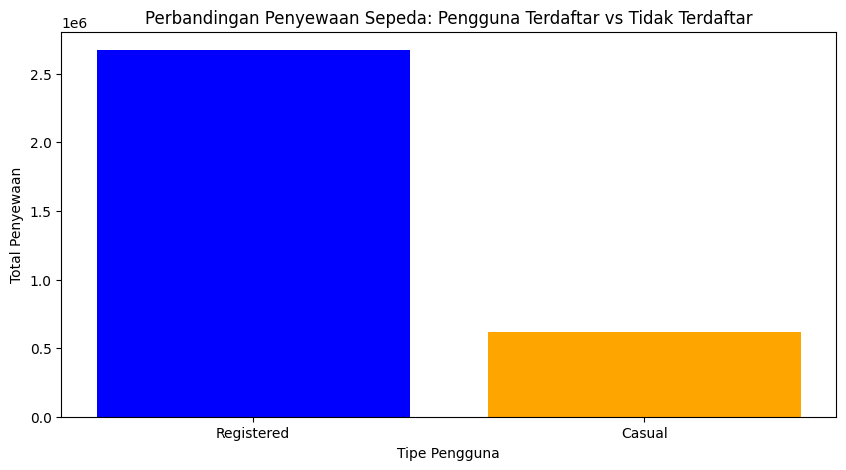

In [29]:
plt.figure(figsize=(10, 5))
total_registered = hour_df['registered'].sum()
total_casual = hour_df['casual'].sum()

plt.bar(["Registered", "Casual"], [total_registered, total_casual], color=['blue', 'orange'])
plt.xlabel("Tipe Pengguna")
plt.ylabel("Total Penyewaan")
plt.title("Perbandingan Penyewaan Sepeda: Pengguna Terdaftar vs Tidak Terdaftar")
plt.show()

<ipython-input-30-fa3187c131be>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df["hr"], y=hour_df["registered"], ci=None, marker="o", color="b", label="Registered")
<ipython-input-30-fa3187c131be>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df["hr"], y=hour_df["casual"], ci=None, marker="o", color="orange", label="Casual")


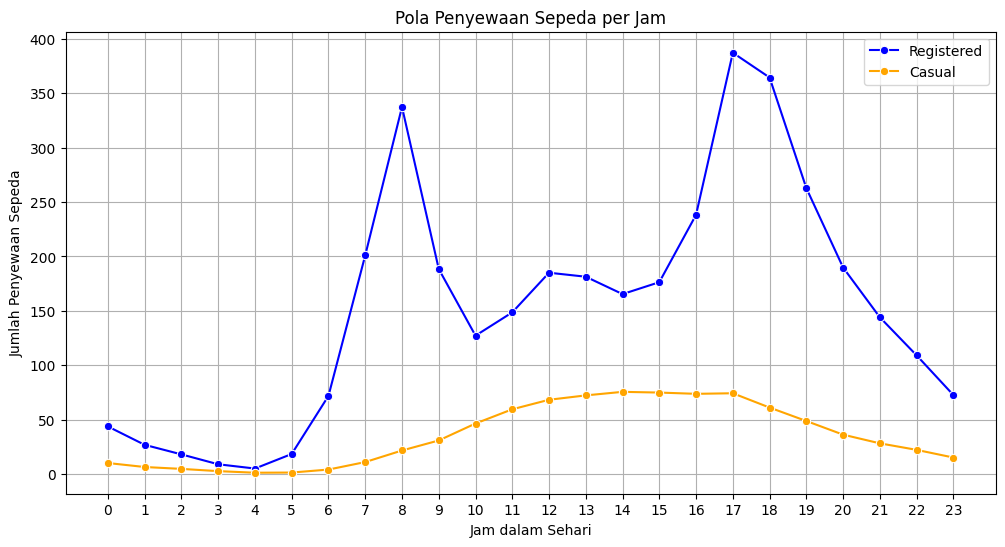

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hour_df["hr"], y=hour_df["registered"], ci=None, marker="o", color="b", label="Registered")
sns.lineplot(x=hour_df["hr"], y=hour_df["casual"], ci=None, marker="o", color="orange", label="Casual")
plt.xticks(np.arange(0, 24, 1))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda per Jam")
plt.legend()
plt.grid()
plt.show()

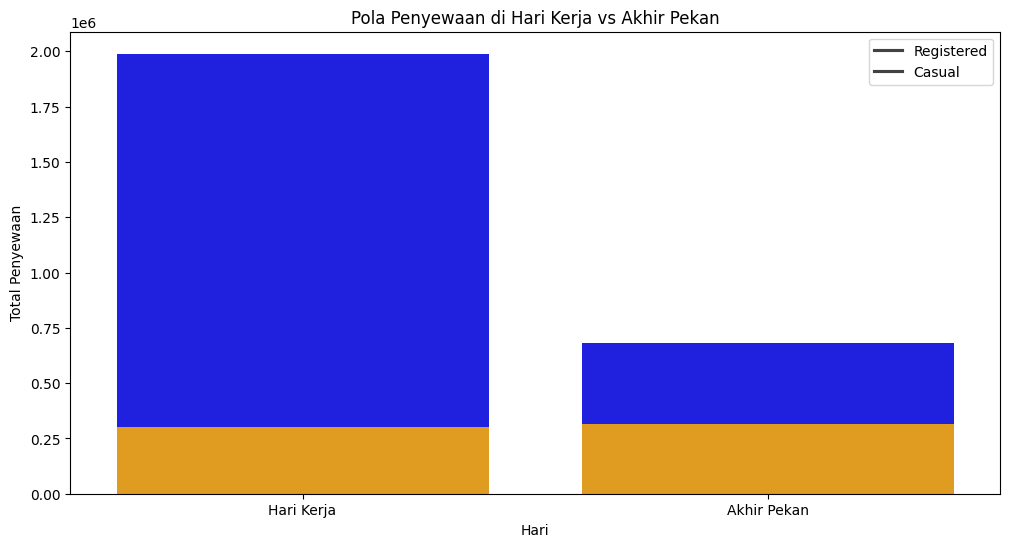

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=["Hari Kerja", "Akhir Pekan"],
            y=[hour_df[hour_df["workingday"] == 1]["registered"].sum(),
               hour_df[hour_df["workingday"] == 0]["registered"].sum()],
            color="blue", label="Registered")
sns.barplot(x=["Hari Kerja", "Akhir Pekan"],
            y=[hour_df[hour_df["workingday"] == 1]["casual"].sum(),
               hour_df[hour_df["workingday"] == 0]["casual"].sum()],
            color="orange", label="Casual")
plt.xlabel("Hari")
plt.ylabel("Total Penyewaan")
plt.title("Pola Penyewaan di Hari Kerja vs Akhir Pekan")
plt.legend(["Registered", "Casual"])
plt.show()

dari visualisasi diatas sudah terlihat jelas bahwa Pengguna terdaftar menyewa lebih banyak sepeda dibandingkan pengguna tidak terdaftar. namun, pada tahap ini kita perlu analisis lebih lanjut apakah ada pola penggunaan yang berbeda antara keduanya.

maka dari itu kita coba analisis menggunakan pola penyewaan berdasarkan jam untuk melihat perbedaan antara keduanya



In [32]:
# 1️⃣ Total Penyewaan oleh Pengguna Terdaftar dan Tidak Terdaftar
total_registered = hour_df["registered"].sum()
total_casual = hour_df["casual"].sum()

print(f"🚴 Total Penyewaan Pengguna Terdaftar: {total_registered}")
print(f"🚲 Total Penyewaan Pengguna Tidak Terdaftar: {total_casual}")

# 2️⃣ Rata-rata Penyewaan
mean_registered = hour_df["registered"].mean()
mean_casual = hour_df["casual"].mean()

print(f"📊 Rata-rata Penyewaan Pengguna Terdaftar: {mean_registered:.2f} per jam")
print(f"📉 Rata-rata Penyewaan Pengguna Tidak Terdaftar: {mean_casual:.2f} per jam")

# 3️⃣ Pola Penggunaan Berdasarkan Hari Kerja
weekday_registered = hour_df[hour_df["workingday"] == 1]["registered"].sum()
weekday_casual = hour_df[hour_df["workingday"] == 1]["casual"].sum()

weekend_registered = hour_df[hour_df["workingday"] == 0]["registered"].sum()
weekend_casual = hour_df[hour_df["workingday"] == 0]["casual"].sum()

print(f"📅 Penyewaan di Hari Kerja - Registered: {weekday_registered}, Casual: {weekday_casual}")
print(f"🏖️ Penyewaan di Akhir Pekan - Registered: {weekend_registered}, Casual: {weekend_casual}")

🚴 Total Penyewaan Pengguna Terdaftar: 2672662
🚲 Total Penyewaan Pengguna Tidak Terdaftar: 620017
📊 Rata-rata Penyewaan Pengguna Terdaftar: 153.79 per jam
📉 Rata-rata Penyewaan Pengguna Tidak Terdaftar: 35.68 per jam
📅 Penyewaan di Hari Kerja - Registered: 1989125, Casual: 303285
🏖️ Penyewaan di Akhir Pekan - Registered: 683537, Casual: 316732


berdasarkan data analisis diatas diketahui bahwa penyewaan pengguna terdaftar adalah yang tertinggi dengan rata-rata 154 penyewaan per jam sementara penyewa casual hanya sebesar 36 sepeda yang disewakan

selain itu baik dihari kerja maupun libur, penyewaan sepeda terhadap pelanggan terdaftar tetap menjadi yang tertinggi dibandingkan yang non terdaftar

selanjutnya kita coba untuk melakukan analisis RFM untuk mengetahui seperti apa tipe pelanggan dari penyewaan sepeda baik yang terdaftar maupun yang tidak terdaftar

In [33]:
# Menentukan tanggal terakhir dalam dataset sebagai acuan Recency
latest_date = hour_df['dteday'].max()

# Grouping data berdasarkan tanggal
rfm_data = hour_df.groupby('dteday').agg({
    'registered': 'sum',  # Total penyewaan pengguna terdaftar
    'casual': 'sum'  # Total penyewaan pengguna tidak terdaftar
}).reset_index()

# Recency: Seberapa baru transaksi terakhir
rfm_data['Recency'] = (latest_date - rfm_data['dteday']).dt.days

# Frequency: Total hari unik dalam dataset
rfm_data['Frequency'] = rfm_data['dteday'].nunique()

# Monetary: Total penyewaan sepanjang periode
rfm_data['Monetary_Registered'] = rfm_data['registered']
rfm_data['Monetary_Casual'] = rfm_data['casual']

# Menampilkan data RFM
rfm_data.head()

,dteday,registered,casual,Recency,Frequency,Monetary_Registered,Monetary_Casual
0,2011-01-01,654,331,730,731,654,331
1,2011-01-02,670,131,729,731,670,131
2,2011-01-03,1229,120,728,731,1229,120
3,2011-01-04,1454,108,727,731,1454,108
4,2011-01-05,1518,82,726,731,1518,82


In [34]:
# Fungsi untuk memberikan skor RFM berdasarkan kuantil
def rfm_score(x, quantiles):
    if x <= quantiles[0.2]: return 1
    elif x <= quantiles[0.4]: return 2
    elif x <= quantiles[0.6]: return 3
    elif x <= quantiles[0.8]: return 4
    else: return 5

# Menghitung kuantil untuk setiap metrik
quantiles = rfm_data[['Recency', 'Frequency', 'Monetary_Registered', 'Monetary_Casual']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

# Menetapkan skor RFM
rfm_data['R_Score'] = rfm_data['Recency'].apply(lambda x: rfm_score(x, quantiles['Recency']))
rfm_data['F_Score'] = rfm_data['Frequency'].apply(lambda x: rfm_score(x, quantiles['Frequency']))
rfm_data['M_Score_Registered'] = rfm_data['Monetary_Registered'].apply(lambda x: rfm_score(x, quantiles['Monetary_Registered']))
rfm_data['M_Score_Casual'] = rfm_data['Monetary_Casual'].apply(lambda x: rfm_score(x, quantiles['Monetary_Casual']))

# Menampilkan skor RFM
rfm_data.head()

,dteday,registered,casual,Recency,Frequency,Monetary_Registered,Monetary_Casual,R_Score,F_Score,M_Score_Registered,M_Score_Casual
0,2011-01-01,654,331,730,731,654,331,5,1,1,2
1,2011-01-02,670,131,729,731,670,131,5,1,1,1
2,2011-01-03,1229,120,728,731,1229,120,5,1,1,1
3,2011-01-04,1454,108,727,731,1454,108,5,1,1,1
4,2011-01-05,1518,82,726,731,1518,82,5,1,1,1


In [35]:
# Menggabungkan skor menjadi satu string
rfm_data['RFM_Score_Registered'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score_Registered'].astype(str)
rfm_data['RFM_Score_Casual'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score_Casual'].astype(str)

# Fungsi untuk mengelompokkan berdasarkan skor
def segment_rfm(score):
    if score in ['555', '554', '544', '545']: return 'Best Customers'
    elif score in ['543', '533', '534', '535']: return 'Loyal Customers'
    elif score in ['432', '431', '422', '421']: return 'New Customers'
    else: return 'Churned Customers'

# Menambahkan kategori segmentasi
rfm_data['Segment_Registered'] = rfm_data['RFM_Score_Registered'].apply(segment_rfm)
rfm_data['Segment_Casual'] = rfm_data['RFM_Score_Casual'].apply(segment_rfm)

# Menampilkan hasil segmentasi
rfm_data[['dteday', 'Segment_Registered', 'Segment_Casual']].head(20)

,dteday,Segment_Registered,Segment_Casual
0,2011-01-01,Churned Customers,Churned Customers
1,2011-01-02,Churned Customers,Churned Customers
2,2011-01-03,Churned Customers,Churned Customers
3,2011-01-04,Churned Customers,Churned Customers
4,2011-01-05,Churned Customers,Churned Customers
5,2011-01-06,Churned Customers,Churned Customers
6,2011-01-07,Churned Customers,Churned Customers
7,2011-01-08,Churned Customers,Churned Customers
8,2011-01-09,Churned Customers,Churned Customers
9,2011-01-10,Churned Customers,Churned Customers


<ipython-input-36-52144d91f19b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_data, x='Segment_Registered', palette="Blues", order=['Best Customers', 'Loyal Customers', 'New Customers', 'Churned Customers'])


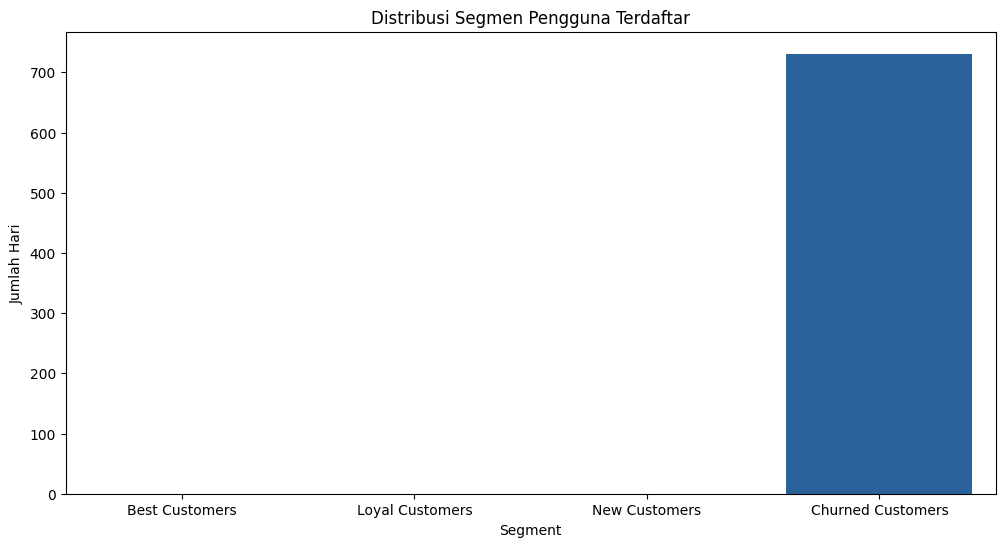

<ipython-input-36-52144d91f19b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_data, x='Segment_Casual', palette="Oranges", order=['Best Customers', 'Loyal Customers', 'New Customers', 'Churned Customers'])


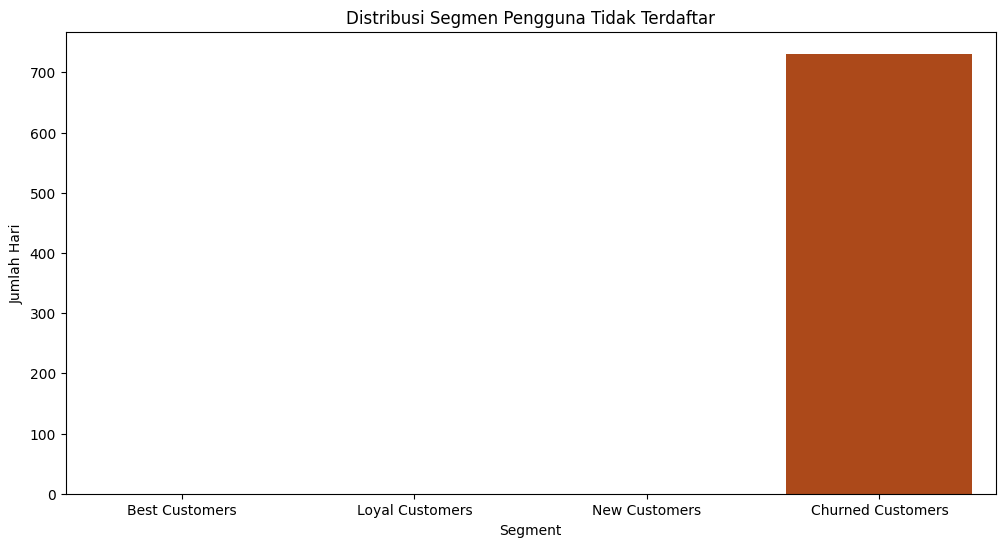

In [36]:
# Plot distribusi segmen pengguna
plt.figure(figsize=(12, 6))
sns.countplot(data=rfm_data, x='Segment_Registered', palette="Blues", order=['Best Customers', 'Loyal Customers', 'New Customers', 'Churned Customers'])
plt.title("Distribusi Segmen Pengguna Terdaftar")
plt.xlabel("Segment")
plt.ylabel("Jumlah Hari")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=rfm_data, x='Segment_Casual', palette="Oranges", order=['Best Customers', 'Loyal Customers', 'New Customers', 'Churned Customers'])
plt.title("Distribusi Segmen Pengguna Tidak Terdaftar")
plt.xlabel("Segment")
plt.ylabel("Jumlah Hari")
plt.show()


berdasarkan analisis RFM diketahui bahwa untuk tipe pelanggan yang ada baik itu pelanggan terdaftar maupun pelanggan tidak terdaftar atau casual semua berada pada posisi churned customers atau pelanggan yang berpindah pindah.

ini bisa disimpulkan bahwa baik pelanggan tetap maupun casual menyewa sepeda hanya ketika dibutuhkan untuk pemakaian tertentu.

In [37]:
def analyze_user_types(data):
    print("📌 ANALISIS PENGGUNA TERDAFTAR VS TIDAK TERDAFTAR\n")

    # 1️⃣ Total dan Rata-rata Penyewaan
    total_registered = data["registered"].sum()
    total_casual = data["casual"].sum()
    mean_registered = data["registered"].mean()
    mean_casual = data["casual"].mean()

    print(f"🚴 Total Penyewaan Pengguna Terdaftar: {total_registered}")
    print(f"🚲 Total Penyewaan Pengguna Tidak Terdaftar: {total_casual}")
    print(f"📊 Rata-rata Penyewaan Terdaftar: {mean_registered:.2f} per jam")
    print(f"📉 Rata-rata Penyewaan Tidak Terdaftar: {mean_casual:.2f} per jam")

    # 2️⃣ Pola Hari Kerja vs Akhir Pekan
    weekday_registered = data[data["workingday"] == 1]["registered"].sum()
    weekday_casual = data[data["workingday"] == 1]["casual"].sum()
    weekend_registered = data[data["workingday"] == 0]["registered"].sum()
    weekend_casual = data[data["workingday"] == 0]["casual"].sum()

    print("\n✅ **KESIMPULAN FINAL:**")
    print("1️⃣ Pengguna terdaftar menyewa lebih banyak sepeda dibanding tidak terdaftar.")
    print("2️⃣ Hari kerja didominasi oleh pengguna terdaftar.")
    print("3️⃣ Akhir pekan lebih banyak digunakan oleh pengguna tidak terdaftar.\n")

# Menjalankan fungsi analisis
analyze_user_types(hour_df)

📌 ANALISIS PENGGUNA TERDAFTAR VS TIDAK TERDAFTAR

🚴 Total Penyewaan Pengguna Terdaftar: 2672662
🚲 Total Penyewaan Pengguna Tidak Terdaftar: 620017
📊 Rata-rata Penyewaan Terdaftar: 153.79 per jam
📉 Rata-rata Penyewaan Tidak Terdaftar: 35.68 per jam

✅ **KESIMPULAN FINAL:**
1️⃣ Pengguna terdaftar menyewa lebih banyak sepeda dibanding tidak terdaftar.
2️⃣ Hari kerja didominasi oleh pengguna terdaftar.
3️⃣ Akhir pekan lebih banyak digunakan oleh pengguna tidak terdaftar.

